# Recommendation System & Market Basket Analysis

The aim of this project is to conduct an analysis of the Recommendation System and Market Basket for a database from Amazon.com.

# Content

* [1. Introduction](#1)
* [2. Business Understanding](#2)
* [3. Data Understanding](#3)
    * [3.1 Load Libraries](#3.1)    
    * [3.2. Load Dataset](#3.2)
    * [3.3. Exploratory Data Analysis (EDA)](#3.3)
    * [3.4. Descriptive Statistics](#3.4)
* [4. Data Preparation](#4)
* [5. Modeling](#5)
    * [5.1. Content-based filtering - Metadata-based recommender](#5.1)    
    * [5.2. Item-Item Collaborative Filtering](#5.2)
    * [5.3. Market Basket Analysis (MBA)](#5.3)
        * [5.3.1. Apriori Algorithm](#5.3.1)
        * [5.3.2. FP Growth Algorithm](#5.3.2)
        * [5.3.3. Metrics Interpretation](#5.3.3)
* [6. Interactive Dashboard](#6)    
* [7. Bibliography](#7)

<a id='1'></a>
# 1. Introduction

In the digital commerce era, recommendation systems have become an essential tool to enhance the customer experience and maximize the operational efficiency of businesses. This project focuses on implementing a recommendation system and a Market Basket analysis, using a database extracted from https://data.world/promptcloud/fashion-products-on-amazon-com.

The aim is twofold; on one hand, I seek to understand and predict user preferences and behaviors to offer personalized product suggestions; on the other, I want to uncover hidden patterns in consumer purchasing decisions through Market Basket analysis, which will allow us to identify which products tend to be purchased together.

To carry out this project, I will adopt the CRISP-DM methodology (Cross-Industry Standard Process for Data Mining), a standard six-phase process that guides from business understanding to the deployment of the data mining model. This approach will ensure a systematic and organized development that will cover business understanding, data understanding, data preparation, modeling, evaluation, and finally, the deployment of the recommendation system and Market Basket analysis.

<a id='2'></a>
# 2. Business Understanding

First of all, you have to understand that there are different types of recommendation engines, such as:

* Content-based filtering
    * Plot description-based recommender
    * Metadata-based recommender


* Collaborative-based filtering (two types):
    * User-User Collaborative Filtering
    * Item-Item Collaborative Filtering


* Hybrid Systems


* ML Clustering


* Market Basket Analysis (association rule mining)
    * Apriori Algorithm
    * FP Growth Algorithm

In this project, I will focus on Content-based filtering, Collaborative-based filtering and Market basket analysis. But before continuing I will make a brief comparison between Collaborative Filtering and Content-Based Filtering System and what is the purpose and benefits that both clients and companies have when creating a recommendation system.

Reference: Hands-On Recommendation Systems with Python, Rounak Banik, Copyright © 2018 Packt Publishing - ISBN 978-1-78899-375-3

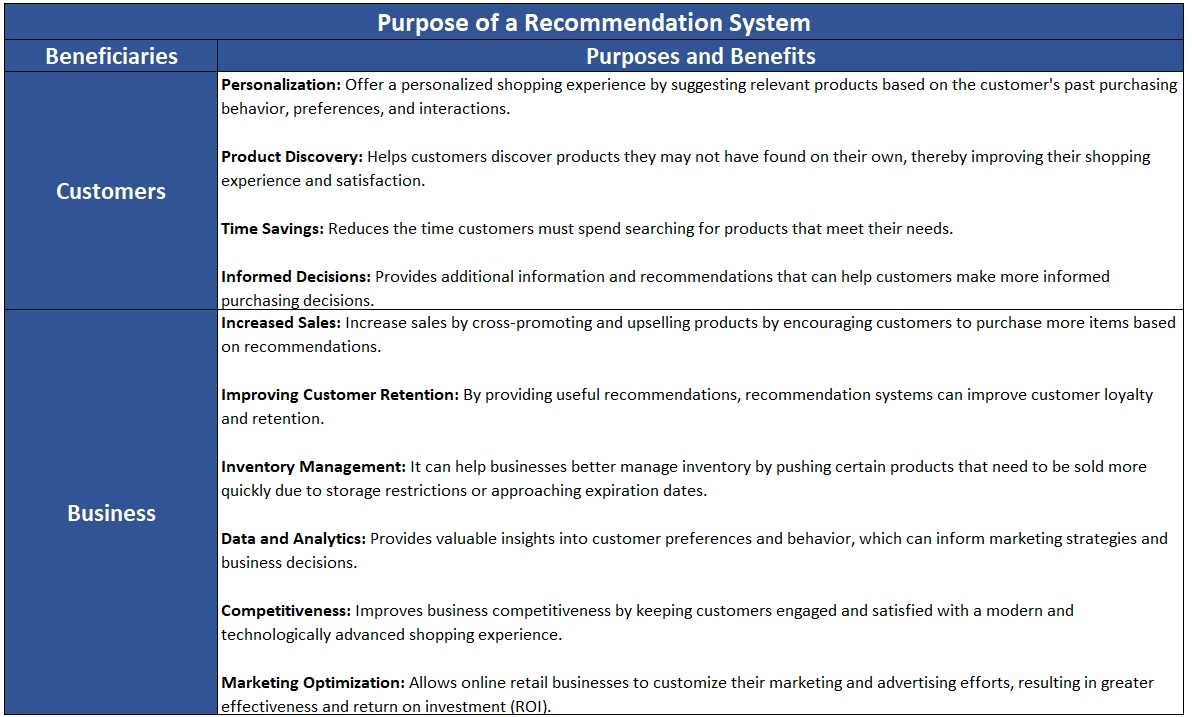

In [2]:
from IPython.display import Image
Image(filename =r'Purpose.jpg')

<a id='3'></a>
# 3. Data Understanding

<a id='3.1'></a>
## 3.1. Load Libraries

In [2]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

import warnings
warnings.filterwarnings('ignore')

<a id='3.2'></a>
## 3.2. Load Dataset

In [3]:
df_amazon = pd.read_csv("amazon_co-ecommerce_sample.csv")

<a id='3.3'></a>
## 3.3. Exploratory Data Analysis (EDA)

In [4]:
df_amazon.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [5]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

<a id='3.4'></a>
## 3.4. Descriptive Statistics

In [6]:
df_amazon.describe()

,number_of_answered_questions
count,9235.000000
mean,1.834976
std,2.517268
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,39.000000


In [7]:
df_amazon.isnull().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

<a id='4'></a>
# 4. Data Preparation

In the field of data analysis, data preparation is a fundamental step that precedes any sophisticated analysis or modeling. This phase is crucial because the quality and structure of the data determine the effectiveness of any Machine Learning algorithm or analysis technique that is applied later. In our project, which focuses on creating a recommendation system based on collaborative and content filtering, along with a market basket analysis for Amazon's online sales, this stage acquires special relevance.

The Amazon dataset we are working with includes various features such as product name, manufacturer, price, number available in stock, number of reviews, average review rating, Amazon category, and more. These data, although rich in information, present several typical challenges in data preparation, such as missing values, the need for data transformation, creation of new variables from existing data, and text cleaning.

Data preparation not only improves the accuracy of models and analyses but also provides deep insights into the nature of the data, which is essential for making informed decisions in the subsequent stages of the project.

I will divide Data Preparation into the following steps:

**Step 1**

In this first step of data preparation, I am going to clean and standardize the text present in the various columns of our DataFrame. This process includes the elimination of all line breaks, the symbols ' and '_', as well as reducing multiple spaces to a single space. The goal of this step is to ensure greater consistency and clarity in the textual data, which is essential for improving the quality of text analysis and facilitating the extraction of multiple features that may be found within a column.

In [8]:
def clean_text(text):
    if not isinstance(text, str):
        return text
    # Remove Line breaks
    text = text.replace('\n', ' ')
    # Replace '_' y '__' with space
    text = text.replace('_', ' ')
    # Replace double or more spaces into one
    text = re.sub(r'\s{2,}', ' ', text)
    return text

df_amazon = df_amazon.applymap(clean_text)

**Step 2**

The next step will be to review the 'customer_reviews' column since within this column there are reviews from different users who bought the product from the 'product_name' column and there is also the rating that each user gave to the purchased product and the date on which the review was carried out, we will assume that it is the date on which the user purchased the product. This data will later help us to carry out a sentiment analysis that will help us make better product recommendations and we will also be able to create a database with different transactions, which will be useful to us to make a Market Basket Analysis.

The reviews in the 'customer_reviews' column follow a pattern that includes the review title, the rating (in numeric format followed by '.0'), the date, the word 'By', and then the user's name. (// 4.0 // 6 April 2014 // By Copnovelist on 6 April 2014 //)

In conclusion, what I am going to do is extract the rating, the date of the review, the user who made the review, and create new rows with each user extracted from the 'customer_reviews' column, storing all the new data and the original data in a new dataframe called 'df_amazon_expanded'.

In [9]:
# Pattern
pattern = r"// (\d+\.\d+) // (\d{1,2} [A-Za-z]+\.? \d{4}) // By (.*?) on \2 //"

# Extract Reviews
def extract_reviews(row):
    if pd.isna(row['customer_reviews']):
        return []
    return re.findall(pattern, row['customer_reviews'])

df_amazon['extracted_reviews'] = df_amazon.apply(extract_reviews, axis=1)

# New DataFrame
reviews_df = df_amazon['extracted_reviews'].apply(pd.Series).stack().reset_index(level=1, drop=True)
reviews_df = reviews_df.apply(pd.Series)
reviews_df.columns = ['review_rating', 'review_date', 'review_author']

# Join the new DataFrame 
df_amazon_expanded = df_amazon.drop(columns=['extracted_reviews']).join(reviews_df)

df_amazon_expanded.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,review_rating,review_date,review_author
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller name 1""=>""Amazon.co.uk"", ...",4.0,6 April 2014,Copnovelist
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller name 1""=>""Amazon.co.uk"", ...",5.0,11 April 2015,richard
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller name 1""=>""Amazon.co.uk"", ...",5.0,23 April 2014,Pinkhandbag
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller name 1""=>""Amazon.co.uk"", ...",5.0,11 Jun. 2014,Gary John Mapson
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller name 1""=>""Amazon.co.uk"", ...",5.0,7 Dec. 2014,David Baker


**Step 3**

Now that we have extracted the name of each user within the 'customer_reviews' column we are going to extract all the unique usernames so we can create a unique ID for each user.

In [10]:
# Unique authors in 'review_author'
unique_authors = df_amazon_expanded['review_author'].unique()

# Author to id
author_to_id = {author: idx for idx, author in enumerate(unique_authors, start=1)}

# New 'author_id' column
df_amazon_expanded['author_id'] = df_amazon_expanded['review_author'].map(author_to_id)

# Adding the prefix 'id' to each identifier 
df_amazon_expanded['author_id'] = 'id' + df_amazon_expanded['author_id'].astype(str)

print(df_amazon_expanded['author_id'])

0           id1
0           id2
0           id3
0           id4
0           id5
         ...   
9999    id14585
9999    id21949
9999    id21950
9999    id21951
9999    id21952
Name: author_id, Length: 29255, dtype: object


**Step 4**

In this step, I am going to extract the currency symbol from the 'price' column in order to leave only the numerical value in the column.

In [11]:
# Extract Price
df_amazon_expanded['price'] = df_amazon_expanded['price'].str.extract(r'(\d+\.?\d*)').astype(float)

print(df_amazon_expanded['price'])

0        3.42
0        3.42
0        3.42
0        3.42
0        3.42
        ...  
9999    21.20
9999    21.20
9999    21.20
9999    21.20
9999    21.20
Name: price, Length: 29255, dtype: float64


**Step 5**

Here I will extract the average rating from the 'average_review_rating' column

In [12]:
# Extract rating
df_amazon_expanded['average_review_rating'] = df_amazon_expanded['average_review_rating'].str.extract(r'(\d+\.\d+)').astype(float)

print(df_amazon_expanded['average_review_rating'])

0       4.9
0       4.9
0       4.9
0       4.9
0       4.9
       ... 
9999    4.5
9999    4.5
9999    4.5
9999    4.5
9999    4.5
Name: average_review_rating, Length: 29255, dtype: float64


**Step 6**

In this step, I will extract all the categories and subcategories found in the 'amazon_category_and_sub_category' column in order to leave each category in a new column to later use in our recommendation models.

In [13]:
# Extract subcategories
num_sub_categories = 5

# Split categories to new columns
split_categories = df_amazon_expanded['amazon_category_and_sub_category'].str.split('>', expand=True).iloc[:, :num_sub_categories]
for i in range(num_sub_categories):
    df_amazon_expanded[f'sub_category{i}'] = split_categories[i]

# Drop 'amazon_category_and_sub_category'
df_amazon_expanded.drop('amazon_category_and_sub_category', axis=1, inplace=True)

**Step 7**

In this step, I am going to clean and transform the 'customers_who_bought_this_item_also_bought' and 'items_customers_buy_after_viewing_this_item' columns, extracting the product names in a more legible and organized manner and I will delete the original columns. This process is useful for future analysis operations, as the product names become more accessible and easier to manipulate.

In [14]:
# Extract product names
def extract_product_names(url_list):
    if not isinstance(url_list, str):
        return []

    # Split the string into individual URLs
    urls = url_list.split('|')

    product_names = []
    for url in urls:
        match = re.search(r'www\.amazon\.co\.uk/([^/]+)', url)
        if match:
            product_names.append(match.group(1).replace('-', ' '))

    return product_names

# Apply 'customers_who_bought_this_item_also_bought'
df_amazon_expanded['extracted_product_names1'] = df_amazon_expanded['customers_who_bought_this_item_also_bought'].apply(extract_product_names)

# Apply 'items_customers_buy_after_viewing_this_item'
df_amazon_expanded['extracted_product_names2'] = df_amazon_expanded['items_customers_buy_after_viewing_this_item'].apply(extract_product_names)

print(df_amazon_expanded[['customers_who_bought_this_item_also_bought', 'extracted_product_names1',
                  'items_customers_buy_after_viewing_this_item', 'extracted_product_names2' ]].head())

# Drop 'customers_who_bought_this_item_also_bought'
df_amazon_expanded.drop('customers_who_bought_this_item_also_bought', axis=1, inplace=True)

# Drop 'items_customers_buy_after_viewing_this_item'
df_amazon_expanded.drop('items_customers_buy_after_viewing_this_item', axis=1, inplace=True)

# Change name 'extracted_product_names1' to 'customers_who_bought_this_item_also_bought'
df_amazon_expanded.rename(columns={'extracted_product_names1': 'customers_who_bought_this_item_also_bought'}, inplace=True)

# Change name 'extracted_product_names2' to 'items_customers_buy_after_viewing_this_item'
df_amazon_expanded.rename(columns={'extracted_product_names2': 'items_customers_buy_after_viewing_this_item'}, inplace=True)

          customers_who_bought_this_item_also_bought  \
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   

                            extracted_product_names1  \
0  [Hornby R8150 Catalogue 2015, Hornby Book Mode...   
0  [Hornby R8150 Catalogue 2015, Hornby Book Mode...   
0  [Hornby R8150 Catalogue 2015, Hornby Book Mode...   
0  [Hornby R8150 Catalogue 2015, Hornby Book Mode...   
0  [Hornby R8150 Catalogue 2015, Hornby Book Mode...   

         items_customers_buy_after_viewing_this_item  \
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   
0  http://www.amazon.co.uk/Hornby-R8150-Catalo

**Step 8**

In this step, I perform a sentiment analysis on customer reviews and categorize these sentiments. This allows for a better understanding of the nature of customer reviews, classifying each review in terms of sentiment (positive, neutral, or negative) where values below -0.01 are "Negative", between -0.01 and 0.01 are "Neutral", and above 0.01 are "Positive". This information is very valuable for understanding the overall perception of the products and will help us to generate better product recommendations in the analysis I will do later.

In [15]:
# Sentiment Analysis 'customer_reviews'
def calculate_sentiment(text):
    try:
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    except:
        return None

df_amazon_expanded['review_sentiment'] = df_amazon_expanded['customer_reviews'].apply(calculate_sentiment)

# Classification
df_amazon_expanded['sentiment_category'] = pd.cut(df_amazon_expanded['review_sentiment'], 
                                           bins=[-1, -0.01, 0.01, 1], 
                                           labels=["Negative", "Neutral", "Positive"])

# Sentiment counts
sentiment_counts = df_amazon_expanded['sentiment_category'].value_counts()

print(sentiment_counts)

Positive    28649
Neutral       356
Negative      228
Name: sentiment_category, dtype: int64


**Step 9**

Here I separate the stock information, which originally combines numbers and text, into two distinct columns for better clarity and ease of analysis. This will be useful for me to analyze separately the quantity of stock (numerical) and the type of stock (text).

In [16]:
def split_number_and_text(s):
    if pd.notnull(s):
        match = re.match(r'(\d+)\s*(\w+)', s)
        if match:
            return match.groups()
    return (None, None)

# Apply the function and create new columns
df_amazon_expanded[['stock_number', 'stock_type']] = df_amazon_expanded['number_available_in_stock'].apply(lambda x: split_number_and_text(x)).apply(pd.Series)

df_amazon_expanded[['number_available_in_stock', 'stock_number', 'stock_type']].head()

,number_available_in_stock,stock_number,stock_type
0,5 new,5,new
0,5 new,5,new
0,5 new,5,new
0,5 new,5,new
0,5 new,5,new


**Step 10**

I am going to replace NaN or empty values in my data frame with 'Unknown'. However, before applying the function df_amazon_expanded.fillna('Unknown', inplace=True), I need to add 'Unknown' to the categories of my column 'sentiment_category' and 'stock_type' but I also need to transform my column 'stock_type' to type category. This step is crucial because, in Pandas, a Categorical column only accepts values that belong to its predefined categories. Attempting to fill in missing values with a category not defined in 'sentiment_category' and 'stock_type' will result in an error. Therefore, I first need to make sure that "Unknown" is included in the set of allowed categories.

Here I manage null values and categorical data, standardizing the way in which situations with incomplete or unknown information are handled. This improves the overall quality of the data and facilitates its subsequent analysis.

In [17]:
# Transform 'stock_type' to categorical and add 'Unknown'
if df_amazon_expanded['stock_type'].dtype != 'category':
    df_amazon_expanded['stock_type'] = df_amazon_expanded['stock_type'].astype('category').cat.add_categories('Unknown')
else:
    df_amazon_expanded['stock_type'] = df_amazon_expanded['stock_type'].cat.add_categories('Unknown')

# Add 'Unknown' to 'sentiment_category' categories
df_amazon_expanded['sentiment_category'] = df_amazon_expanded['sentiment_category'].cat.add_categories('Unknown')

# Fill NaN values throughout the DataFrame with 'Unknown'
df_amazon_expanded.fillna('Unknown', inplace=True)

**Step 11**

In this step I will transform all the string-type columns of my dataframe to lowercase, I do this so that I can later associate these columns with each other, therefore they must have the same format and type. However, before doing this, I need to transform the 'customers_who_bought_this_item_also_bought' and 'items_customers_buy_after_viewing_this_item' columns since these columns are lists represented as strings (e.g. "['item1', 'item2']"). So I must transform them to string type.

In [18]:
# Transform lists represented as strings to string-type.
df_amazon_expanded['customers_who_bought_this_item_also_bought'] = df_amazon_expanded['customers_who_bought_this_item_also_bought'].astype(str)
df_amazon_expanded['items_customers_buy_after_viewing_this_item'] = df_amazon_expanded['items_customers_buy_after_viewing_this_item'].astype(str)

# Convert to lowercase if the element is a string
def to_lower_if_string(x):
    if isinstance(x, str):
        return x.lower()
    return x

# Apply the function to each element of the DataFrame
df_amazon_expanded = df_amazon_expanded.applymap(to_lower_if_string)

**Stop 12**

Here I am standardizing the data type of several important columns, converting certain columns to numeric values to ensure that the numeric values are consistent and properly converted. This is crucial for conducting precise numerical and statistical analyses in subsequent steps.

In [19]:
# Transform the columns to integer
cols_to_convert = ['price', 'number_of_reviews', 'number_of_answered_questions', 
                   'average_review_rating','review_rating','review_sentiment', 'stock_number']

for col in cols_to_convert:
    df_amazon_expanded[col] = pd.to_numeric(df_amazon_expanded[col], errors='coerce')

# Transform to int64
for col in cols_to_convert:
    if df_amazon_expanded[col].notnull().all():
        df_amazon_expanded[col] = df_amazon_expanded[col].astype('int64')

**Step 13**

In this step, I ensure that all the data in the 'review_date' column are in a coherent and manageable date format for any subsequent temporal analysis. Additionally, I remove rows with invalid or unknown dates, thus improving the quality of the data for future analyses that depend on precise dates.

In [20]:
# Convert 'review_date' column to date format
df_amazon_expanded['review_date'] = pd.to_datetime(df_amazon_expanded['review_date'], errors='coerce')

# Delete rows where the date could not be converted (i.e. 'unknown')
df_amazon_expanded = df_amazon_expanded.dropna(subset=['review_date'])

**Step 14**

Here I am creating a unique identifier for each transaction by combining the information of the review author and the review date, which is useful as it helps me to distinguish between different transactions or interactions of users with the products.

In [21]:
# Convert review_date to a string
df_amazon_expanded['review_date'] = df_amazon_expanded['review_date'].astype(str)

# Creating a Unique Identifier
df_amazon_expanded['id_transaction'] = df_amazon_expanded['author_id'].astype(str) + '_' + df_amazon_expanded['review_date']

**Step 15**

In this step, I am going to standardize and clean the 'stock_number' column, ensuring that all values are integers and replacing any missing data with 0. I am doing this to later use this column in my dashboard.

In [22]:
# Convert 'stock_number' to numeric, forcing non-numeric to NaN
df_amazon_expanded['stock_number'] = pd.to_numeric(df_amazon_expanded['stock_number'], errors='coerce')

# Replace NaN with 0 in 'stock_number'
df_amazon_expanded['stock_number'].fillna(0, inplace=True)

# Convert 'stock_number' to integer
df_amazon_expanded['stock_number'] = df_amazon_expanded['stock_number'].astype('int64')

print(df_amazon_expanded['stock_number'])

0        5
0        5
0        5
0        5
0        5
        ..
9999    31
9999    31
9999    31
9999    31
9999    31
Name: stock_number, Length: 29130, dtype: int64


<a id='5'></a>
# 5. Modeling

Here I will focus on two types of recommendations:

* Content-based filtering
    * Metadata-based recommender


* Collaborative-based filtering:
    * Item-Item Collaborative Filtering

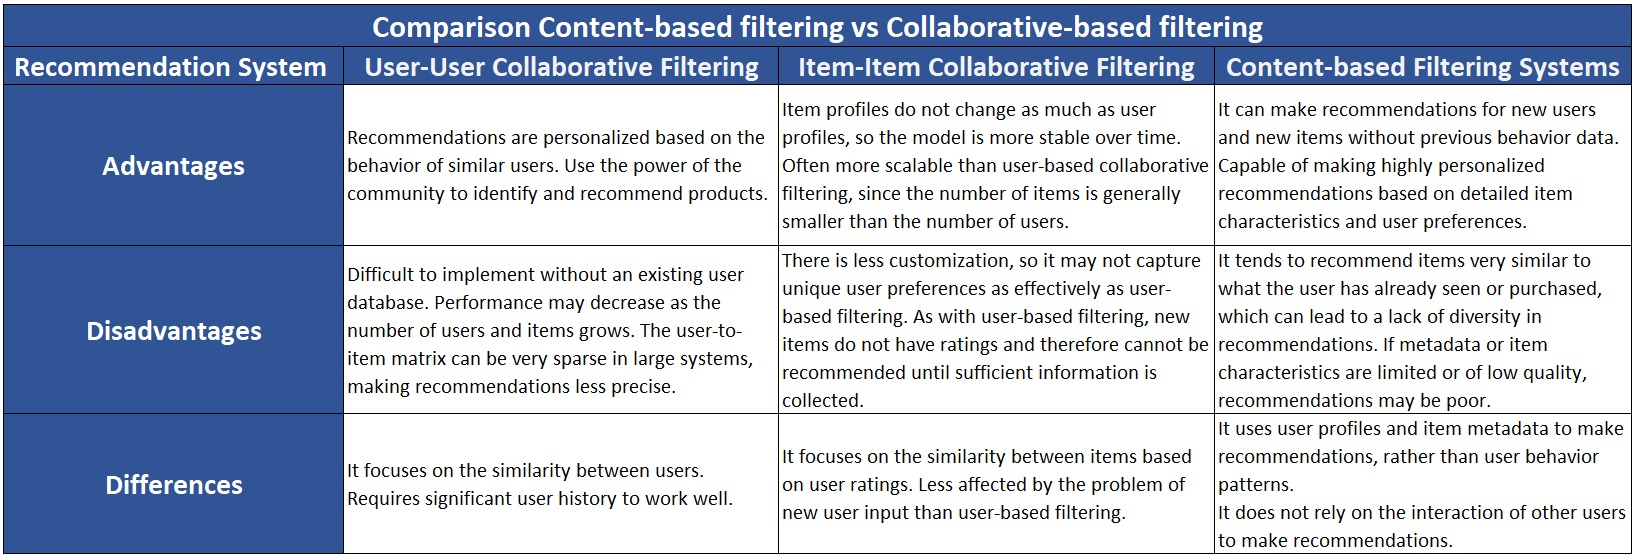

In [23]:
Image(filename =r'Comparison.jpg')

<a id='5.1'></a>
## 5.1. Content-based filtering - Metadata-based recommender

According to our data, a metadata-based recommendation system would be the most suitable option for recommendation, as our DataFrame includes a variety of features such as the product name, Amazon category and subcategory, product description, and customer reviews. Additionally, we previously conducted a sentiment analysis, which will help us make more accurate recommendations. These data provide a wealth of information that can be used to create a metadata-based recommendation model.

Furthermore, unlike models that focus on plot descriptions or stories, our data does not center around this type of characteristic, making the approach based on plot descriptions less relevant.

On the other hand, the complexity of the Product Data we are analyzing (such as model train sets) may have unique characteristics that are better captured through a more detailed analysis of the metadata, rather than just focusing on general descriptions.

Since users may have specific preferences in terms of product features, a metadata-based approach can provide more personalized and relevant recommendations.

In summary, a metadata-based recommendation approach will more effectively leverage the variety and richness of the available data, providing more accurate and customized recommendations to users.

Reference: Chapter 4.Building Content-Based Recommenders - Hands-On Recommendation Systems with Python, Rounak Banik, Copyright © 2018 Packt Publishing - ISBN 978-1-78899-375-3

In [24]:
 df_selected = df_amazon_expanded[
        ['uniq_id','product_name','manufacturer','description','product_information','sub_category0','sub_category1',
         'sub_category2','sub_category3','sub_category4','sentiment_category']]

In [25]:
columns_to_concatenate = ['manufacturer','description','product_information','sub_category0',
                          'sub_category1','sub_category2','sub_category3','sub_category4','sentiment_category']

df_selected['concatenated_metadata'] = df_selected[columns_to_concatenate].apply(
    lambda x: ' '.join(x.dropna().astype(str)), axis=1
)

In [26]:
df_selected[['concatenated_metadata']].head(5)

,concatenated_metadata
0,hornby product description hornby 2014 catalog...
0,hornby product description hornby 2014 catalog...
0,hornby product description hornby 2014 catalog...
0,hornby product description hornby 2014 catalog...
0,hornby product description hornby 2014 catalog...


In [27]:
tfidf = TfidfVectorizer(stop_words='english')
df_selected['concatenated_metadata'] = df_selected['concatenated_metadata'].fillna('').astype(str)

tfidf_matrix = tfidf.fit_transform(df_selected['concatenated_metadata'])

In [28]:
tfidf_matrix.shape

(29130, 54821)

In this case, as our dataframe is not very large, we use cosine for the entire tfidf matrix. In contrast, if the data we are using is very large, it is advisable to add some parameters to calculate the cosine. In this scenario, we would use 'linear_kernel(tfidf_matrix[:10000], tfidf_matrix[:10000])', which would only take the first 10,000 records.

In [29]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [30]:
# Function to get recommendations based on cosine similarity
def get_recommendations(title, cosine_sim, df_selected, indices):
    # Get the index of the product that matches the title
    idx = indices[title]

    # Get the similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Initialize a set to store already seen uniq_ids
    seen_uniq_ids = set()

    # List to store the indices of recommended products
    recommended_indices = []

    # Go through the similarity scores and collect indices of unique recommendations
    for i, score in sim_scores:
        if len(recommended_indices) >= 10:
            break
        if df_selected['uniq_id'].iloc[i] not in seen_uniq_ids:
            seen_uniq_ids.add(df_selected['uniq_id'].iloc[i])
            recommended_indices.append(i)

    # Return the 10 most similar products (unique in terms of uniq_id)
    return df_selected['product_name'].iloc[recommended_indices]

In [31]:
# Reset index of your main DataFrame and construct reverse mapping as before
df_selected = df_selected.reset_index()
indices = pd.Series(df_selected.index, index=df_selected['product_name'])

In [32]:
# Get recommendations for a specific product
recommendations = get_recommendations('justice league of america series 3 green lantern action figure', cosine_sim, df_selected, indices)

recommendations

29123    justice league of america series 3 green lante...
3134     dc collectibles comics super villains black ad...
3224        men in black 3 10cm basic action figure: boris
29118    batman 1966 tv series action figures - the rid...
3020     dc comics total heroes detective batman 6" act...
18372                      dc new 52 hawkman action figure
26183    fisher price - dc super friends - imaginext - ...
25960          dc comics multiverse 4" basic figure, robin
2903     dc comics batman hush harley quinn real action...
15584    dc comics deck building game crisis expansion ...
Name: product_name, dtype: object

Here we can observe that the recommendations are quite close to the characteristics of the selected product ('justice league of america series 3 green lantern action figure') as the recommendations also refer to other toys that belong to the same category.

<a id='5.2'></a>
## 5.2. Item-Item Collaborative Filtering

For the data I am using, Item-Item Collaborative Filtering fits better since e-commerce systems like Amazon usually have a large number of users but a relatively smaller number of items, making the Item-Item approach more manageable in terms of computational complexity. Additionally, users' preferences for certain products can be more stable and defined, which facilitates the identification of purchasing patterns and preferences. Also, in the context of online sales, recommendations based on product similarities can be more relevant and useful for users, as they reflect current market trends and preferences.

The Item-Item approach is usually more suitable for systems with a large number of users and a relatively smaller number of items, as is the case with e-commerce platforms. Moreover, it offers better stability and precision in recommendations in a dynamic environment like online sales. However, we must consider that our data does not have a large number of users and products, as it is only a sample. It should be noted that to make much more precise recommendations, we would need much larger data, but we do not have the computational resources to run the models.


Next, I will provide details of the steps I take for an analysis focused on Item-Item Collaborative Filtering:

* **Step 1:** Here, I prepare the Utility Matrix by creating a matrix A of zeros, where the rows represent the users (n_users) and the columns represent the products (n_items). I also map the user and product IDs to indices in the matrix and fill the matrix with user ratings for each product.


* **Step 2:** In this step, the binarization of the utility matrix converts the ratings into binary values: 1 for ratings of 3 or higher (positive) and 0 for ratings below 3.


* Step 3:** A CSR array is created from the transposed matrix, which transposes the matrix A and converts it into a CSR (Compressed Sparse Row) array. This changes the focus to similarities between products instead of between users, which is the Item-Item approach we are giving.


* **Step 4:** In this step, I train the KNN Model using the cosine metric to calculate the distance or similarity between data points. The cosine metric measures the cosine similarity between two vectors. In this step, the 'brute' algorithm parameter is used, which performs a full brute-force calculation of distances between all pairs of points. Since our dataframe is not very large, it is more appropriate than 'auto'. The 'n_neighbors=3' parameter specifies the number of nearest neighbors to find. In this case, the 3 nearest neighbors are sought, and finally, the 'n_jobs=-1' parameter allows the use of multiple processing cores to calculate the nearest neighbors. -1 means that all available cores on the machine will be used.


* Step 5:** In the recommendations with product names, I sort the dataset by 'author_id' and 'review_date' and select the recently rated products by a specific user (id34).


* **Step 6:** In this step, I initialize lists to store distances and indices of nearest neighbors. For each product rated by the user, the most similar products (nearest neighbors) are found using the KNN model.


* **Step 7:** Lastly, I perform an inverse mapping of the indices to the product IDs to obtain the names of the recommended products and remove duplicates.

In [33]:
# Prepare the Utility Matrix
n_users = df_amazon_expanded['author_id'].nunique()
n_items = df_amazon_expanded['uniq_id'].nunique()

# Create a utility matrix A of zeros
A = np.zeros((n_users, n_items))

# Mapping of user ID and product ID to matrix indices
user_id_mapping = {id:i for i, id in enumerate(df_amazon_expanded['author_id'].unique())}
product_id_mapping = {id:i for i, id in enumerate(df_amazon_expanded['uniq_id'].unique())}

# Fill the matrix with ratings
for line in df_amazon_expanded.itertuples():
    A[user_id_mapping[line.author_id], product_id_mapping[line.uniq_id]] = line.review_rating

print("Original rating matrix : ", A)

Original rating matrix :  [[4. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 5.]]


In [34]:
# Binarization of utility matrix A
A[A >= 3] = 1
A[A < 3] = 0

In [35]:
# Create a CSR array from the transposed matrix
csr_sample = csr_matrix(A.T)

In [36]:
# Train the KNN model
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3, n_jobs=-1)
knn.fit(csr_sample)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=3)

In [37]:
# Recommendations with Product Names

# Sort by 'author_id' and 'review_date' in descending order
dataset_sort_des = df_amazon_expanded.sort_values(['author_id', 'review_date'], ascending=[True, False])

# Filter to get the items that the user with 'author_id' = id34 has rated
filter1 = dataset_sort_des[dataset_sort_des['author_id'] == 'id34'][['uniq_id', 'product_name']]
filter1 = filter1.head(10)  # 10 most recent items

print("Items liked by user:")
for index, row in filter1.iterrows():
    print(f"uniq_id: {row['uniq_id']} - product_name: {row['product_name']}")

Items liked by user:
uniq_id: 9a73c72220e23a2ffa8d9d8859064af1 - product_name: 2 pairs dji phantom 3 e305 9450 props carbon fiber reinforced self-tightening propellers (composite hub, black with yellow stripes) for phantom 3 professional, advanced, phantom 2 series, flame wheel series platforms and the e310/e305/e300 tuned propulsion systems black w/ yellow stripes
uniq_id: de132b2e93776b3f1a7801b01b11d577 - product_name: match attax champions league 15/16 mini tin with 35 player cards + limited card
uniq_id: 1ebe107a86f358440e3da1e52c7df0d8 - product_name: ravensburger thomas & friends snakes and ladders game
uniq_id: 804c329dcc4acdf897f72fece0119019 - product_name: copag texas hold'em poker 300 chips set
uniq_id: 2e341e0b640299236bddc938d5697402 - product_name: comic bags resealable (silver size, pack of 100)
uniq_id: 5439328c1ae48f77d93c112525cf14e6 - product_name: papo a050028 - lioness
uniq_id: 61df06b02b7e7f4a6a046bc88ef9c4ee - product_name: 1 x sheet paw patrol tattoos marshall,

In [38]:
# Initialization of Lists for Distances and Indices
distances1 = []
indices1 = []

# Verify and process each uniq_id in filter1
for uniq_id in filter1['uniq_id']:
    # Verify that the uniq_id is in the mapping
    if uniq_id in product_id_mapping:
        # Get the index corresponding to the uniq_id
        product_index = product_id_mapping[uniq_id]

        # Get the nearest neighbors for the given index
        distances, indices = knn.kneighbors(csr_sample[product_index], n_neighbors=3)
        indices = indices.flatten()
        indices = indices[1:]  # Remove the item itself

        indices1.extend(indices)
    else:
        print(f"uniq_id {uniq_id} not found in product_id_mapping")

print("Items to be recommended: ", indices1)

Items to be recommended:  [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]


In [39]:
# Paso 7

# Inverse mapping from index to product ID
index_to_product_id = {i: product_id for product_id, i in product_id_mapping.items()}

# Convert the indices to uniq_id
recommended_product_ids = [index_to_product_id[i] for i in indices1]

# Get the product names for the recommended uniq_ids
recommended_products = df_amazon_expanded[df_amazon_expanded['uniq_id'].isin(recommended_product_ids)]

# Select only the columns 'uniq_id' and 'product_name', and remove duplicates
recommended_products = recommended_products[['uniq_id', 'product_name']].drop_duplicates()

print("Recommended products:")
for index, row in recommended_products.iterrows():
    print(f"uniq_id: {row['uniq_id']} - product_name: {row['product_name']}")

Recommended products:
uniq_id: b17540ef7e86e461d37f3ae58b7b72ac - product_name: funkybuys® large christmas holiday express festive train set (si-ty1017) toy light / sounds / battery operated & smoke
uniq_id: 348f344247b0c1a935b1223072ef9d8a - product_name: classic toy train set track carriages light engine boxed boys kids battery


By working with the transposed matrix, the model identifies similar products based on how different users interact with them, which is essential in item-based collaborative filtering.

In this case, we can see that the product recommendations based on the preferences of a specific user (id34) reflect products with similar interaction profiles.

<a id='5.3'></a>
## 5.3. Market Basket Analysis (MBA)

Here I will perform a Market Basket Analysis for the Amazon online sales dataframe, which is a modeling technique used to predict customers' purchasing behavior. It is based on the idea that if you buy a certain group of items, you are likely to buy another group of items. For example, if someone buys bread and butter, they might also buy jam.

This is useful for making product recommendations as in e-commerce, it also aids in store design as in supermarkets, which helps to organize products in a way that encourages cross-selling, and also in creating promotions and discounts by identifying products that are frequently bought together.

Here I will conduct two types of Market Basket Analysis, one based on the Apriori Algorithm and the other on the FP Growth Algorithm. In the following table are some characteristics, advantages, and disadvantages of each, and at the end of the analysis, I will review some differences between their results.

Reference: Chapter 8 - Market Basket Analysis - The Unsupervised Learning Workshop by Aaron Jones, Christopher Kruger, and Benjamin Johnston - Copyright © 2020 Packt Publishing - ISBN: 978-1-80020-070-8

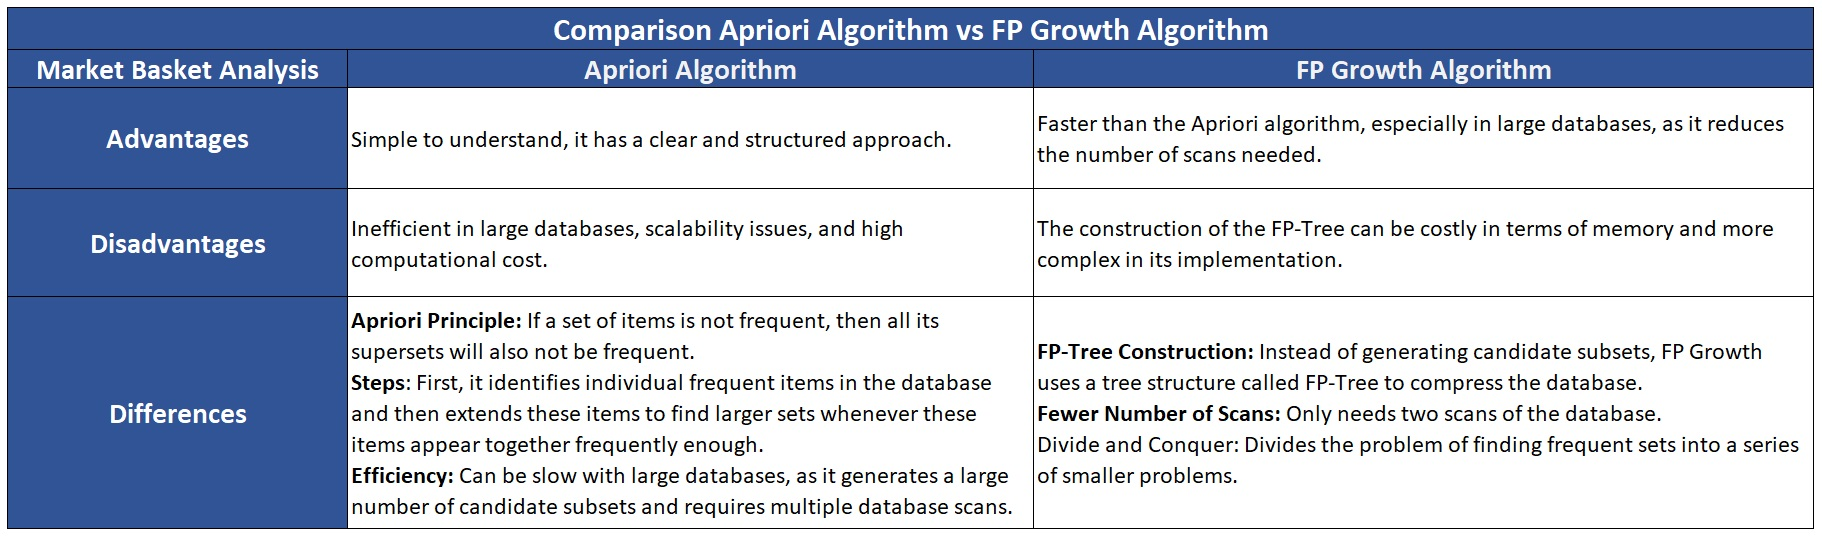

In [40]:
Image(filename =r'Apriori_Algorithm_vs_FP_Growth_Algorithm.jpg')

First, I will start with the selection of data, for which I will choose the column I previously created with a unique transaction ID ('id_transaction') and the column of the set of products that the customer purchased together ('customers_who_bought_this_item_also_bought').

Additionally, I will use the same parameters for both algorithms to compare their results.

* **min_support = 0.001** 
                This is a measure of how frequently a set of items appears in the dataset. Here I am setting a minimum support threshold of 0.1%, where only item sets that appear in at least 0.1% of all transactions will be considered frequent and, therefore, included in the analysis. In this case, I am using a not very high measure since in our database we do not have a high number of transactions, so if we use a higher percentage, the model will not be able to detect the products that are purchased together. In both algorithms, this parameter helps to filter out sets of items that are not commonly purchased together, reducing the number of combinations that the algorithm needs to explore. Note: The lower the percentage, the more CPU and GPU are required for the analysis.


* **min_threshold = 0.01** 
                When generating association rules after identifying frequent item sets, the **min_threshold** is used to filter these rules based on the specified metric. In this case, the model is looking for association rules with at least 1% confidence. Confidence is a measure of the likelihood of seeing the consequent items in a transaction, given that this transaction contains the antecedent items. In both algorithms, this parameter is used after finding frequent item sets to determine how strong the association rules must be to be considered in the analysis. A rule with high confidence suggests a strong relationship between the antecedent and consequent items.
                
                                                                   
* **rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8) ]** 
                This is an additional filter, which looks for rules that not only have high confidence (at least 80%) but also a high lift (at least 6). Lift is a measure of how much more often the antecedent and consequent items occur together than would be expected if they were statistically independent. A lift greater than 1 suggests that the items are positively associated.

In [41]:
# Data selection
df_market_basket = df_amazon_expanded[['id_transaction','customers_who_bought_this_item_also_bought']]

<a id='5.3.1'></a>
### 5.3.1. Apriori Algorithm

In [42]:
# Transform the column 'customers_who_bought_this_item_also_bought' into a list
df_market_basket['customers_who_bought_this_item_also_bought'] = df_market_basket['customers_who_bought_this_item_also_bought'].apply(eval)

# Group products by transaction
basket_sets = df_market_basket.groupby('id_transaction')['customers_who_bought_this_item_also_bought'].sum()

# Convert to a list of lists
transactions = basket_sets.tolist()

In [43]:
# TransactionEncoder and transform the data
encoder = TransactionEncoder()
transactions_encoded = encoder.fit(transactions).transform(transactions)

# Transform to DataFrame
df_transactions = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

# Apriori Algorithm
frequent_itemsets = apriori(df_transactions, min_support=0.001, use_colnames=True)

print(frequent_itemsets)

      support                                           itemsets
0    0.001472                 (12pcs 1 2 inch scenery landscape)
1    0.001692             (15ml body adhesive brush applicator )
2    0.002502  (15pcs miniature porcelain plate colorful floral)
3    0.001361          (1st birthday printed pearlised balloons)
4    0.001030                       (24 kids super hero tattoos)
..        ...                                                ...
722  0.001435  (dungeon masters dungeons dragons accessories ...
723  0.001435  (dungeon masters dungeons dragons accessories ...
724  0.001913  (dungeons dragons players handbook rulebooks, ...
725  0.001214  (motion sand%c2%ae castle bucket playset, moti...
726  0.001435  (dungeon masters dungeons dragons rulebooks, d...

[727 rows x 2 columns]


In [44]:
# Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(15ml body adhesive brush applicator ),(girls 10ml glitter tattoo glue),0.001692,0.003863,0.001692,1.000000,258.857143,0.001686,inf,0.997826
1,(girls 10ml glitter tattoo glue),(15ml body adhesive brush applicator ),0.003863,0.001692,0.001692,0.438095,258.857143,0.001686,1.776649,1.000000
2,(15pcs miniature porcelain plate colorful floral),(dollhouse miniature assorted chocolate strawb...,0.002502,0.001214,0.001214,0.485294,399.705882,0.001211,1.940498,1.000000
3,(dollhouse miniature assorted chocolate strawb...,(15pcs miniature porcelain plate colorful floral),0.001214,0.002502,0.001214,1.000000,399.705882,0.001211,inf,0.998711
4,(15pcs miniature porcelain plate colorful floral),(miniature kitchen accessory coloured saucepan),0.002502,0.001177,0.001104,0.441176,374.724265,0.001101,1.787367,0.999833


In [45]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(15ml body adhesive brush applicator ),(girls 10ml glitter tattoo glue),0.001692,0.003863,0.001692,1.000000,258.857143,0.001686,inf,0.997826
3,(dollhouse miniature assorted chocolate strawb...,(15pcs miniature porcelain plate colorful floral),0.001214,0.002502,0.001214,1.000000,399.705882,0.001211,inf,0.998711
5,(miniature kitchen accessory coloured saucepan),(15pcs miniature porcelain plate colorful floral),0.001177,0.002502,0.001104,0.937500,374.724265,0.001101,15.959971,0.998507
8,(aquaplay 250 motorboat 2 puppets),(aquaplay 252 aquaplay sailboats puppets),0.001325,0.001214,0.001141,0.861111,709.242424,0.001139,7.191258,0.999914
9,(aquaplay 252 aquaplay sailboats puppets),(aquaplay 250 motorboat 2 puppets),0.001214,0.001325,0.001141,0.939394,709.242424,0.001139,16.478146,0.999804
...,...,...,...,...,...,...,...,...,...,...
788,"(dungeons dragons players handbook rulebooks, ...",(dungeon masters dungeons dragons rulebooks),0.001435,0.004194,0.001435,1.000000,238.421053,0.001429,inf,0.997237
791,"(dungeons dragons starter boxed game, dungeon ...","(dungeons dragons players handbook rulebooks, ...",0.001472,0.003532,0.001435,0.975000,276.046875,0.001430,39.858720,0.997846
796,"(dungeons dragons players handbook rulebooks, ...","(dungeon masters dungeons dragons rulebooks, m...",0.001472,0.003348,0.001435,0.975000,291.214286,0.001430,39.866078,0.998035
797,"(dungeons dragons starter boxed game, dungeon ...","(dungeons dragons players handbook rulebooks, ...",0.001435,0.003974,0.001435,1.000000,251.666667,0.001429,inf,0.997458


Rule 1: When "15ml body adhesive brush applicator" is bought, "girls 10ml glitter tattoo glue" is bought 100% of the time (confidence = 1.0), and this association is 258.86 times more likely than expected by chance (lift = 258.86).


Rule 2: Similarly, "dollhouse miniature assorted chocolate strawb..." is always purchased with "15pcs miniature porcelain plate colorful floral" (confidence = 1.0), with a very high lift (399.70), indicating a strong association.

In [46]:
product_name_1 = '15ml body adhesive brush applicator'  # Example: 'girls 10ml glitter tattoo glue'
product_name_2 = 'girls 10ml glitter tattoo glue'  # Example: '15ml body adhesive brush applicator'

# Count the occurrences of each product
product_count_1 = df_transactions[product_name_1].sum()
product_count_2 = df_transactions[product_name_2].sum()

print(f"Occurrences of {product_name_1}: {product_count_1}")
print(f"Occurrences of {product_name_2}: {product_count_2}")

Occurrences of 15ml body adhesive brush applicator: 1
Occurrences of girls 10ml glitter tattoo glue: 105


Here we can analyze how many opportunities exist to use the popularity of one product to boost the sales of another. For example, we can see that we sell only 1 product of '15ml body adhesive brush applicator' but there are 105 sales of 'girls 10ml glitter tattoo glue', so perhaps we can generate more sales of '15ml body adhesive brush applicator' through recommendations.

<a id='5.3.2'></a>
### 5.3.2. FP Growth Algorithm

In [47]:
# FP Growth Algorithm
frequent_itemsets_fp = fpgrowth(df_transactions, min_support=0.001, use_colnames=True)

print(frequent_itemsets_fp)

      support                                           itemsets
0    0.002060               (melissa doug deluxe puppet theatre)
1    0.001803                 (melissa doug 13899 pirate puppet)
2    0.001361               (melissa doug 13892 princess puppet)
3    0.001214               (melissa doug police officer puppet)
4    0.001104                   (melissa doug 13890 king puppet)
..        ...                                                ...
722  0.001692  (15ml body adhesive brush applicator , girls 1...
723  0.001398  (pack girls glitter tattoo stencils, girls 10m...
724  0.001251  (girls brush set glitter tattoo, girls 10ml gl...
725  0.001361  (mixed girls glitter tattoo stencils, girls 10...
726  0.001251  (playmobil 6038 hawk knights cannon, playmobil...

[727 rows x 2 columns]


In [48]:
# Association Rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.01)
rules_fp.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(melissa doug deluxe puppet theatre),(melissa doug 13899 pirate puppet),0.002060,0.001803,0.001619,0.785714,435.830904,0.001615,4.658254,0.999765
1,(melissa doug 13899 pirate puppet),(melissa doug deluxe puppet theatre),0.001803,0.002060,0.001619,0.897959,435.830904,0.001615,9.779809,0.999507
2,(melissa doug 13892 princess puppet),(melissa doug 13899 pirate puppet),0.001361,0.001803,0.001288,0.945946,524.710425,0.001285,18.466648,0.999455
3,(melissa doug 13899 pirate puppet),(melissa doug 13892 princess puppet),0.001803,0.001361,0.001288,0.714286,524.710425,0.001285,3.495235,0.999897
4,(melissa doug 13892 princess puppet),(melissa doug deluxe puppet theatre),0.001361,0.002060,0.001104,0.810811,393.532819,0.001101,5.274824,0.998819


In [49]:
rules_fp[ (rules_fp['lift'] >= 6) &
       (rules_fp['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(melissa doug 13899 pirate puppet),(melissa doug deluxe puppet theatre),0.001803,0.002060,0.001619,0.897959,435.830904,0.001615,9.779809,0.999507
2,(melissa doug 13892 princess puppet),(melissa doug 13899 pirate puppet),0.001361,0.001803,0.001288,0.945946,524.710425,0.001285,18.466648,0.999455
4,(melissa doug 13892 princess puppet),(melissa doug deluxe puppet theatre),0.001361,0.002060,0.001104,0.810811,393.532819,0.001101,5.274824,0.998819
8,"(melissa doug 13892 princess puppet, melissa d...",(melissa doug 13899 pirate puppet),0.001104,0.001803,0.001104,1.000000,554.693878,0.001102,inf,0.999300
9,"(melissa doug 13892 princess puppet, melissa d...",(melissa doug deluxe puppet theatre),0.001288,0.002060,0.001104,0.857143,416.020408,0.001101,6.985578,0.998883
...,...,...,...,...,...,...,...,...,...,...
801,(mexican train domino game aluminum),(tactic o2588 mexican train),0.001214,0.001472,0.001177,0.969697,658.909091,0.001176,32.951435,0.999696
804,(15ml body adhesive brush applicator ),(girls 10ml glitter tattoo glue),0.001692,0.003863,0.001692,1.000000,258.857143,0.001686,inf,0.997826
806,(pack girls glitter tattoo stencils),(girls 10ml glitter tattoo glue),0.001692,0.003863,0.001398,0.826087,213.838509,0.001392,5.727787,0.997011
808,(girls brush set glitter tattoo),(girls 10ml glitter tattoo glue),0.001251,0.003863,0.001251,1.000000,258.857143,0.001246,inf,0.997385


Rule 0: "Melissa doug 13899 pirate puppet" is bought together with "melissa doug deluxe puppet theatre" 89.8% of the time (confidence = 0.8979), with a significant lift of 435.83.


Rule 3: "Melissa doug 13892 princess puppet" is bought together with "melissa doug 13899 pirate puppet" on 94.6% of occasions (confidence = 0.9459), indicating a strong relationship between these products.

In [50]:
product_name_1 = 'melissa doug 13899 pirate puppet'  # Example: 'melissa doug 13899 pirate puppet'
product_name_2 = 'melissa doug deluxe puppet theatre'  # Example: 'melissa doug deluxe puppet theatre'

# Count the occurrences of each product
product_count_1 = df_transactions[product_name_1].sum()
product_count_2 = df_transactions[product_name_2].sum()

print(f"Occurrences of {product_name_1}: {product_count_1}")
print(f"Occurrences of {product_name_2}: {product_count_2}")

Occurrences of melissa doug 13899 pirate puppet: 49
Occurrences of melissa doug deluxe puppet theatre: 56


Here we can analyze how many opportunities exist to use the popularity of one product to boost the sales of another. For example, we can see that we sell 49 product of 'melissa doug 13899 pirate puppet' but there are 56 sales of 'melissa doug deluxe puppet theatre', so perhaps we can generate more sales of 'melissa doug 13899 pirate puppet' through recommendations.

<a id='5.3.3'></a>
### 5.3.3. Metrics Interpretation 

* Antecedents: Items in the rule that predict the presence of the consequents.


* Consequents: Items that appear with the antecedents.


* Antecedent Support: Frequency of the antecedents in the dataset.


* Consequent Support: Frequency of the consequents in the dataset.


* Support: Frequency of both antecedents and consequents together.


* Confidence: Probability of finding the consequents in transactions containing the antecedents.


* Lift: How much more often the antecedents and consequents occur together than would be expected if they were independent. A value greater than 1 suggests a positive association.


* Leverage: Difference in the frequency of appearance of the antecedents and consequents together in transactions than would be expected if they were independent.


* Conviction: Measure of the dependence of the consequents on the antecedents. A high value suggests strong dependence.


* Zhang's Metric: Measure of certainty and direction of the rule.



Reference: Chapter 8 - Market Basket Analysis - The Unsupervised Learning Workshop by Aaron Jones, Christopher Kruger, and Benjamin Johnston - Copyright © 2020 Packt Publishing - ISBN: 978-1-80020-070-8

<a id='6'></a>
# 6. Interactive Dashboard aimed at older adults (65+)

At this point, I will create an interactive dashboard that summarizes the most important aspects of our dataframe in a manner that is friendly for senior adults. Here, I will focus on several key aspects:

**Simplicity and Clarity:** Since the dashboard is aimed at older adults, it's crucial that the interface is simple, clear, and easy to navigate. This means avoiding the color blue for important interface elements, not using font sizes smaller than 16 pixels, employing gentle color schemes, and allowing individuals to adjust the text size themselves.

**Large and Legible Visual Elements:** I will use large and clear charts and text to facilitate understanding and reading.

**Relevant Data and Summaries:** I will select the most relevant data to display on the dashboard. As I am working with a recommendation system and a market basket analysis, it would be useful to show metrics like the best-selling products, the most popular categories, and product recommendations.

**Interactivity:** I will enable users to interact with the data to explore different aspects, such as filters by categories, date ranges, or prices.

**This dashboard will be created in Tableau, and you can view it at the following link:** https://public.tableau.com/app/profile/francisco.gorigoitia

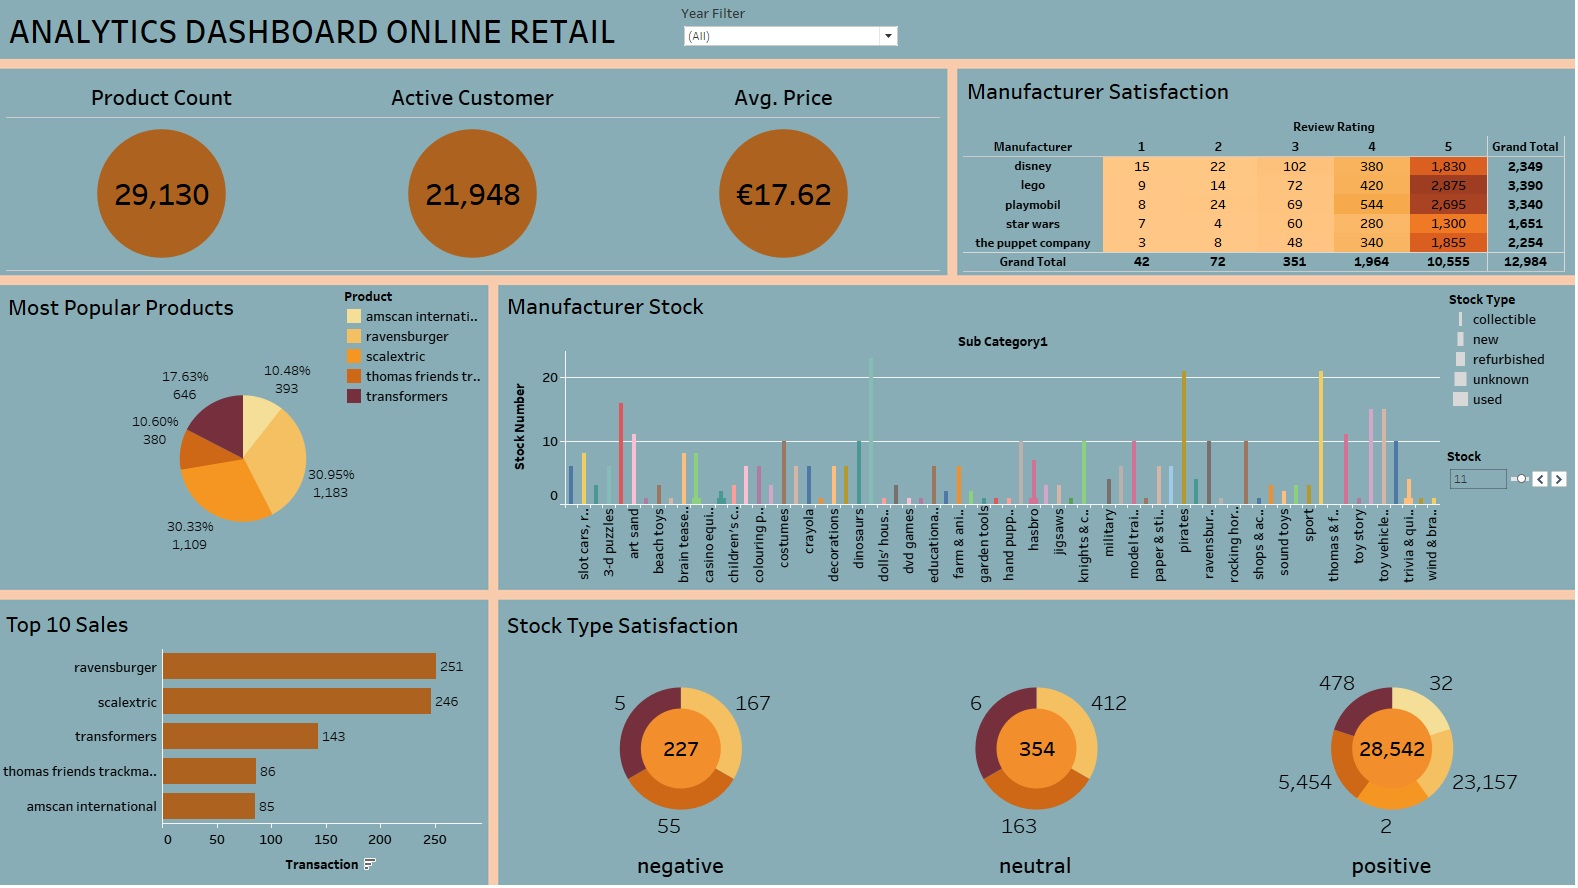

In [3]:
Image(filename =r'Dashboard.jpg')

<a id='7'></a>
# 7. Bibliography

* The Unsupervised Learning Workshop by Aaron Jones, Christopher Kruger, and Benjamin Johnston - Copyright © 2020 Packt Publishing - ISBN: 978-1-80020-070-8

* Hands-On Recommendation Systems with Python, Rounak Banik, Copyright © 2018 Packt Publishing - ISBN 978-1-78899-375-3

* Text Analytics with Python: A Practical Real-World Approach to Gaining Actionable Insights from Your Data, Copyright © 2016 by Dipanjan Sarkar

* Storytelling with Data: A Data Visualization Guide for Business Professionals 1st Edition, Copyright © 2015 by Cole Nussbaumer Knaflic